In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install sklearn
!pip install scipy
!pip install pydotplus

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import datetime
from pandas.api.types import is_numeric_dtype
import sklearn as skl
from scipy.stats import skewnorm
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus

You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
#df = pd.get_dummies(df, columns=['species'], prefix=['species'])
df['ordered_species'] = pd.Categorical(df.species,
                                                            ordered=True,
                                                            categories=['Adelie', 'Chinstrap', 'Gentoo']
                                                            ).codes

In [6]:
#df = pd.get_dummies(df, columns=['island'], prefix=['island'])
df['ordered_island'] = pd.Categorical(df.island,
                                                            ordered=True,
                                                            categories=['Torgersen', 'Biscoe', 'Dream']
                                                            ).codes

In [7]:
df['is_female'] = df['sex'] == 'Female'

In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
df.drop(['sex', 'species', 'island'], axis=1, inplace=True)

In [10]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,ordered_species,ordered_island,is_female
0,39.10000,18.70000,181.000000,3750.000000,0,0,False
1,39.50000,17.40000,186.000000,3800.000000,0,0,True
2,40.30000,18.00000,195.000000,3250.000000,0,0,True
3,43.92193,17.15117,200.915205,4201.754386,0,0,False
4,36.70000,19.30000,193.000000,3450.000000,0,0,True
...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,2,1,False
340,46.80000,14.30000,215.000000,4850.000000,2,1,True
341,50.40000,15.70000,222.000000,5750.000000,2,1,False
342,45.20000,14.80000,212.000000,5200.000000,2,1,True


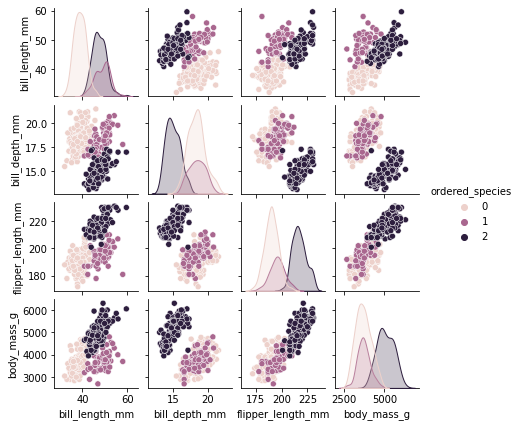

In [11]:
sns.pairplot(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'ordered_species']], hue='ordered_species', height=1.5)



In [ ]:
#### After this graph, we cna appreciate that body_mass_g vs bill_length_mm gives a good split.
#### Bill_length_mm vs bill_depth_mm seems interesting too.

/Users/lucaskujawski/.virtualenvs/data2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lucaskujawski/.virtualenvs/data2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


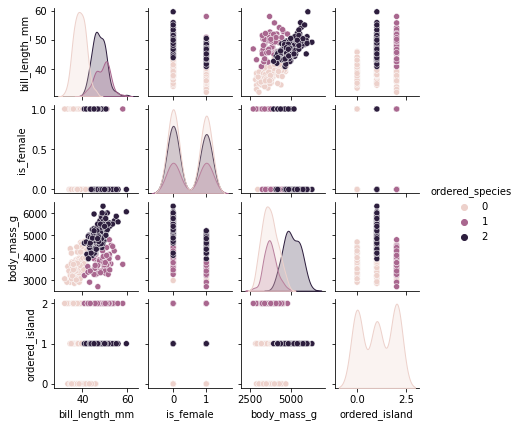

In [13]:
sns.pairplot(df[['bill_length_mm', 'is_female', 'body_mass_g', 'ordered_island', 'ordered_species']], hue='ordered_species', height=1.5)


After this graph, we can appreciate that there is not an important relation more than what we observed before. 

In [ ]:
We will check the accuracy of the models trained on:
    1. body_mass_g vs bill_length_mm
    2. bill_length_mm vs bill_depth_mm

In [30]:
X = df[['body_mass_g', 'bill_length_mm']]
Y = df['ordered_species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,
                                                random_state=1)

In [31]:
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print("body_mass_g vs bill_length_mm accuracy: ", metrics.accuracy_score(ytest, y_model))

body_mass_g vs bill_length_mm accuracy:  0.9130434782608695


In [41]:
X = df[['bill_depth_mm', 'bill_length_mm']]
Y = df['ordered_species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,
                                                random_state=1)

In [42]:
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print("bill_depth_mm vs bill_length_mm accuracy: ", metrics.accuracy_score(ytest, y_model))

bill_depth_mm vs bill_length_mm accuracy:  0.9420289855072463


In [ ]:
We see that bill_depth_mm vs bill_length_mm has better accuracy. Lets plot it

In [45]:
def bayes_plot(df,model="gnb",spread=30):
    df.dropna()
    colors = 'seismic'
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]
    sns.scatterplot(data=df, x=col1, y=col2,hue=target)
    plt.show()
    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)  # 70% training and 30% test

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)
    
    # Train Classifer
    

    prob = len(clf.classes_) == 2

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

    hueorder = clf.classes_
    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:

        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()

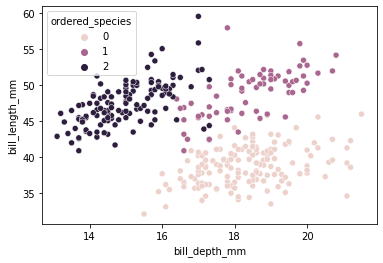

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.82      0.82      0.82        11
           2       0.92      1.00      0.96        24

    accuracy                           0.94        69
   macro avg       0.91      0.92      0.92        69
weighted avg       0.94      0.94      0.94        69



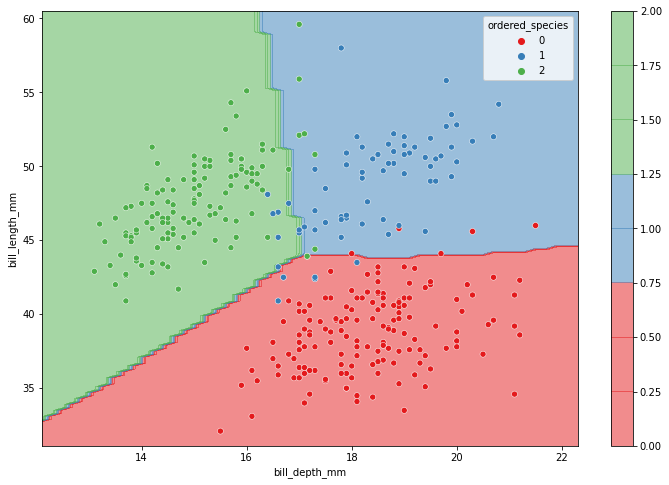

In [46]:
bayes_plot(pd.concat([X,Y],axis=1),spread=1)